In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [155]:
df = pd.read_csv("D:/ML/customer-churn.csv")
df_temp = df
df[0:5:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [156]:
#df.pop('customerID') #dropping it because we don't need CustomerID to determine soomething from data
df.pop('customerID')
df.TotalCharges.values
#Total charges has data types as Object, but we want it to be in float
pd.to_numeric(df.TotalCharges, errors='coerce') # this line will convert the string values into Numebrs but It will Ignore some of the values which have spaces in them
df = df[df.TotalCharges!=' ']
df.TotalCharges = pd.to_numeric(df.TotalCharges)



c:\Users\asus\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


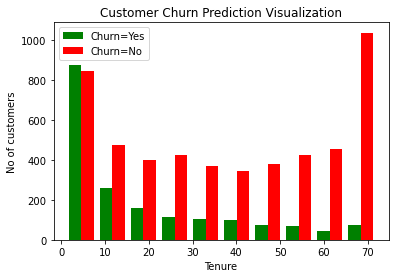

In [157]:
#Some Data visualization for Better understanding the data
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure
plt.xlabel("Tenure")
plt.ylabel("No of customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

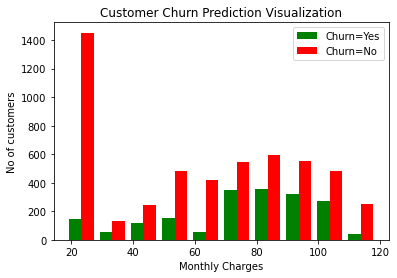

In [158]:
MonCharge_churn_no = df[df.Churn == 'No'].MonthlyCharges
MonCharge_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges
plt.xlabel("Monthly Charges")
plt.ylabel("No of customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([MonCharge_churn_yes, MonCharge_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [159]:
def Print_Unique_Col(df):
    for col in df:
        if df[col].dtype == 'object':
            print(col, '-->  ', df[col].unique() )
Print_Unique_Col(df)

gender -->   ['Female' 'Male']
Partner -->   ['Yes' 'No']
Dependents -->   ['No' 'Yes']
PhoneService -->   ['No' 'Yes']
MultipleLines -->   ['No phone service' 'No' 'Yes']
InternetService -->   ['DSL' 'Fiber optic' 'No']
OnlineSecurity -->   ['No' 'Yes' 'No internet service']
OnlineBackup -->   ['Yes' 'No' 'No internet service']
DeviceProtection -->   ['No' 'Yes' 'No internet service']
TechSupport -->   ['No' 'Yes' 'No internet service']
StreamingTV -->   ['No' 'Yes' 'No internet service']
StreamingMovies -->   ['No' 'Yes' 'No internet service']
Contract -->   ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -->   ['Yes' 'No']
PaymentMethod -->   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn -->   ['No' 'Yes']


In [160]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)
Print_Unique_Col(df)

gender -->   ['Female' 'Male']
Partner -->   ['Yes' 'No']
Dependents -->   ['No' 'Yes']
PhoneService -->   ['No' 'Yes']
MultipleLines -->   ['No' 'Yes']
InternetService -->   ['DSL' 'Fiber optic' 'No']
OnlineSecurity -->   ['No' 'Yes']
OnlineBackup -->   ['Yes' 'No']
DeviceProtection -->   ['No' 'Yes']
TechSupport -->   ['No' 'Yes']
StreamingTV -->   ['No' 'Yes']
StreamingMovies -->   ['No' 'Yes']
Contract -->   ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -->   ['Yes' 'No']
PaymentMethod -->   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn -->   ['No' 'Yes']


c:\Users\asus\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [161]:
df.replace('Yes',1,inplace=True)
df.replace('No',0,inplace=True)
df.replace("Female", 1, inplace=True)
df.replace("Male", 0, inplace=True)
Print_Unique_Col(df)

InternetService -->   ['DSL' 'Fiber optic' 0]
Contract -->   ['Month-to-month' 'One year' 'Two year']
PaymentMethod -->   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [162]:
#one Hot Encoding
df = pd.get_dummies(data=df, columns=['InternetService', 'Contract','PaymentMethod'])
df.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [163]:
# for col in df:
#     print(col, '-->  ', df[col].unique(), df[col].dtype )
#Scaling the Columns with continuous values between 0-1 with Min Max Scaler
cols_toScale = ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_toScale] = scaler.fit_transform(df[cols_toScale])

In [164]:
#Data Cleaning is pretty much completed and now we need to Split our data into Test and Train

y = df.Churn
X = df.drop('Churn', axis='columns')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)
print(x_train.shape, x_test.shape)


(5625, 26) (1407, 26)


In [172]:
#Now the data is splitted we can build our model accordingly
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(units= 26, input_shape = (26,), activation = 'relu'),
    #Dense(units= 10, activation = 'relu'),
    Dense(units= 1, activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy', 
    metrics = ['accuracy']
)

In [166]:
from tabnanny import verbose
model.fit(x_train, y_train, epochs = 50, verbose = 1)

Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 0.4952 - accuracy: 0.7559
Epoch 2/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 0.7909
Epoch 3/50
176/176 [==============================] - 0s 992us/step - loss: 0.4216 - accuracy: 0.7988
Epoch 4/50
176/176 [==============================] - 0s 997us/step - loss: 0.4169 - accuracy: 0.8018
Epoch 5/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4147 - accuracy: 0.8043
Epoch 6/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4117 - accuracy: 0.8055
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8068
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8059
Epoch 9/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4081 - accuracy: 0.8098
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.

In [167]:
acc = model.evaluate(x_test, y_test)
print("Accuracy on testing is: ", acc[1]*100)

44/44 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.7868
Accuracy on testing is:  78.67803573608398


In [168]:
yp = model.predict(x_test)
yp[:5]

44/44 [==============================] - 0s 951us/step


array([[0.19913208],
       [0.30696872],
       [0.02309495],
       [0.70143676],
       [0.5863404 ]], dtype=float32)

In [169]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [170]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       999
           1       0.66      0.55      0.60       408

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(69.0, 0.5, 'Truth')

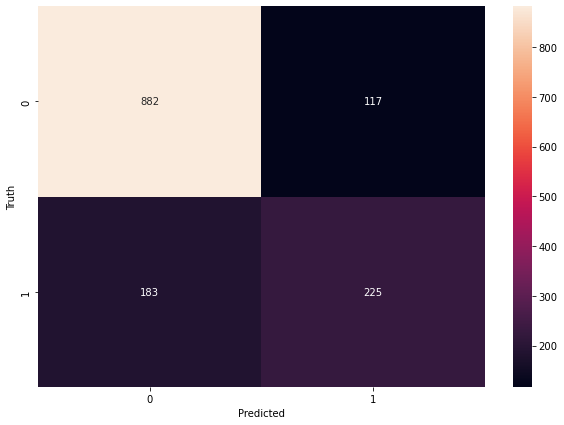

In [171]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_pred)
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot = True, fmt= 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")